# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

# Overall Project Idea
The idea of this project is to analyze the word frequency of manuals from the two popular gaming consoles Play Station and Xbox to see what common shared and unique terms they utilize. Specifically, I wanted to see how Microsoft differentiated their Xbox X|S and Xbox S manuals and how those differentiated from Sony's PS 5 manual. The spark for this project idea stemmed from the fact that gaming manuals are not read very often so they could have interesting patterns and contents in them that may differentiate company to company.

## Converting the Data from PDF into Text
Here, I am opening all of the pdf files of the game manuals and converting them into text files through the PyPDF2 library.

In [15]:
import matplotlib.pyplot as plt
import PyPDF2, re

# Converting xbox s pdf file into a text file
xboxsfile = open('XBOX_ONE_S_MANUAL.pdf', 'rb')
xboxsreader = PyPDF2.PdfFileReader(xboxsfile)
xspages = xboxsreader.numPages
xboxs_text = ""

for i in range(xspages):
    xspageobj = xboxsreader.getPage(i)
    xboxs_text += xspageobj.extractText() +'\n'

file0 = open("xboxs_manual.txt","a")
file0.truncate(0)
file0.writelines(xboxs_text)

xboxsfile.close()
file0.close()


# Converting xbox x|s pdf file into a text file
xboxfile = open('XBOX_SERIES_XS_MANUAL.pdf', 'rb')
xboxreader = PyPDF2.PdfFileReader(xboxfile)
xpages = xboxreader.numPages
xbox_text = ""

for i in range(xpages):
    xpageobj = xboxreader.getPage(i)
    xbox_text += xpageobj.extractText() +'\n'

file1 = open("xbox_manual.txt","a")
file1.truncate(0)
file1.writelines(xbox_text)

xboxfile.close()
file1.close()

# Converting ps5 pdf file into a text file
ps5file = open('PS5_Quick_Start_Guide.pdf', 'rb')
ps5reader = PyPDF2.PdfFileReader(ps5file)
ps5pages = ps5reader.numPages
ps5_text = ""

for i in range(ps5pages):
    ps5pageobj = ps5reader.getPage(i)
    ps5_text += ps5pageobj.extractText() +'\n'

file2 = open("ps5_manual.txt","a")
file2.truncate(0)
file2.writelines(ps5_text)

ps5file.close()
file2.close()

## Cleaning Up Text Files
After having converted the files from pdf into text files, there came the realization that there were a lot of weird formatting that came from the conversion including ASCII values, combined words, footers, symbols, etc. Therefore, although this caused some issues and set backs, I was able to clean up the text files through the utilization of regex substitution before actually analyzing the data.

In [16]:
# Some issues arrised due to the txt data having a lot of data incorrectness.

# Cleaning up xbox s text file
with open('xboxs_manual.txt','r+') as f0:
    file0 = f0.read()
    file0 = re.sub(r'^\d+(•)?', '', file0, 0, re.M)
    file0 = re.sub(r'(+.++(.+)?(.+)?)', '', file0)
    file0 = re.sub(r'(•)', '', file0)
    file0 = re.sub(r'([a-z]+)([A-Z][a-z]+)', r'\1 \2', file0)
    f0.seek(0)
    f0.write(file0)
    f0.truncate()

# Cleaning up xbox text file
with open('xbox_manual.txt','r+') as f1:
    file1 = f1.read()
    file1 = re.sub(r'^\d+(•)?', '', file1, 0, re.M)
    file1 = re.sub(r'(+.++(.+)?(.+)?)', '', file1)
    file1 = re.sub(r'(•)', '', file1)
    file1 = re.sub(r'([a-z]+)([A-Z][a-z]+)', r'\1 \2', file1)
    f1.seek(0)
    f1.write(file1)
    f1.truncate()

# Cleaning up ps5 text file
with open('ps5_manual.txt','r+') as f2:
    file2 = f2.read()
    file2 = re.sub(r'(CFI-1115B 5-031-580- 11\(1\))\d?\d?(CFI-1115B)?', '', file2)
    file2 = re.sub(r'EN', '', file2)
    file2 = re.sub(r'(•)', '', file2)
    f2.seek(0)
    f2.write(file2)
    f2.truncate()

## Text Analysis Begins
After having cleaned up the text files, it was then ready to go through all the text files and extract all the individual words from the files and give a count for each word in the three gaming console manuals. 

## Part One and Two: Comparing the word frequencies between two works of a single author and one work from another author
Here, the first part of the assignment is getting completed. The three works were Xbox S Manual, Xbox X|S Manual, and PS 5 Manual. All top 15 words of each manual get outputted below to stdout where you can see that articles or conjunctions such as "the" or "and" were the most common words in all three works.

In [17]:
# Getting the content and actually getting all the most common words and frequences

f0 = open('xboxs_manual.txt','r+')
f1 = open('xbox_manual.txt','r+')
f2 = open('ps5_manual.txt','r+')

# Xbox s most common words printing
xboxs_frequencies = {}
xboxs_string = f0.read().lower()
xboxs_content = re.findall(r'\b[a-z]{3,20}\b', xboxs_string)
  
for word in xboxs_content:
    count = xboxs_frequencies.get(word,0)
    xboxs_frequencies[word] = count + 1
 
xboxs_by_freq = dict(sorted(xboxs_frequencies.items(), key=lambda w: w[1], reverse=True))
 
xboxs_by_freq_num = xboxs_by_freq.keys()

i = 0

print("Top 15 Most Common Xbox S Manual Words:")
for words in xboxs_by_freq_num:
    print(words, xboxs_by_freq[words])
    i += 1
    if i == 15:
        break

# Xbox X|S most common words printing
xbox_frequencies = {}
xbox_string = f1.read().lower()
xbox_content = re.findall(r'\b[a-z]{3,20}\b', xbox_string)
  
for word in xbox_content:
    count = xbox_frequencies.get(word,0)
    xbox_frequencies[word] = count + 1
 
xbox_by_freq = dict(sorted(xbox_frequencies.items(), key=lambda w: w[1], reverse=True))
 
xbox_by_freq_num = xbox_by_freq.keys()

i = 0

print("\nTop 15 Most Common Xbox X|S Manual Words:")
for words in xbox_by_freq_num:
    print(words, xbox_by_freq[words])
    i += 1
    if i == 15:
        break

# PS 5 most common words printing
ps5_frequencies = {}
ps5_string = f2.read().lower()
ps5_content = re.findall(r'\b[a-z]{3,20}\b', ps5_string)
  
for word in ps5_content:
    count = ps5_frequencies.get(word,0)
    ps5_frequencies[word] = count + 1
 
ps5_by_freq = dict(sorted(ps5_frequencies.items(), key=lambda w: w[1], reverse=True))
 
ps5_by_freq_num = ps5_by_freq.keys()

i = 0

print("\nTop 15 Most Common PS5 Manual Words:")
for words in ps5_by_freq_num:
    print(words, ps5_by_freq[words])
    i += 1
    if i == 15:
        break

Top 15 Most Common Xbox S Manual Words:
the 215
and 166
not 69
your 64
for 62
you 55
xbox 55
console 47
that 42
use 41
device 40
with 38
may 38
microsoft 37
other 37

Top 15 Most Common Xbox X|S Manual Words:
the 197
and 169
your 125
device 104
not 68
for 57
with 53
you 51
microsoft 49
use 47
that 40
power 39
can 36
may 35
other 35

Top 15 Most Common PS5 Manual Words:
the 122
your 85
and 64
you 56
console 54
power 22
can 20
controller 19
from 18
use 18
for 18
button 18
screen 16
game 16
with 15


### Graphs
Here is a side by side comparison of all word's top 15 most common words ordered from most frequent to least frequent. This helps give a better visualization of the word frequency differences and similarities across the three works.

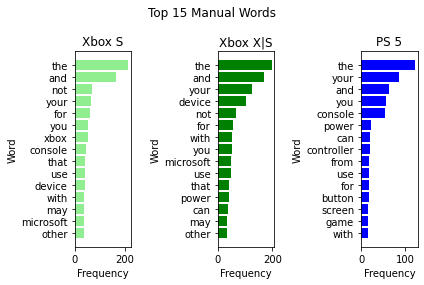

In [18]:
# Creating the x and y axis for both consoles
xboxs_top15words = list(xboxs_by_freq.keys())[0:15]
xboxs_top15freq = list(xboxs_by_freq.values())[0:15]

xbox_top15words = list(xbox_by_freq.keys())[0:15]
xbox_top15freq = list(xbox_by_freq.values())[0:15]

ps5_top15words = list(ps5_by_freq.keys())[0:15]
ps5_top15freq = list(ps5_by_freq.values())[0:15]

# Graphing begins
fig = plt.figure()
plt.suptitle("Top 15 Manual Words")

# Xbox X|S Graph
ax = fig.add_subplot(1, 3, 1)
ax.barh(xboxs_top15words, xboxs_top15freq, color="lightgreen")
ax.set_xlabel("Frequency")
ax.set_ylabel("Word")
ax.invert_yaxis()
ax.set_title("Xbox S")
plt.tight_layout()

# Xbox X|S Graph
ax1 = fig.add_subplot(1, 3, 2)
ax1.barh(xbox_top15words, xbox_top15freq, color="green")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Word")
ax1.invert_yaxis()
ax1.set_title("Xbox X|S")
plt.tight_layout()

# PS 5 Graph
ax2 = fig.add_subplot(1, 3, 3)
ax2.barh(ps5_top15words, ps5_top15freq, color="blue")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Word")
ax2.invert_yaxis()
ax2.set_title("PS 5")
plt.tight_layout()

plt.show()

## Part Three: Comparing the Different Unique Words of Two Different Works from Two Different Authors
Here, I identified the unique words in the Xbox X|S and PS 5 Manuals and represented them through a side by side bar graph comparison.

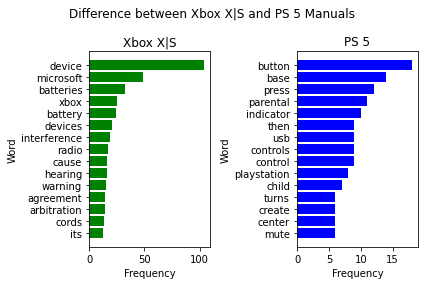

In [19]:
# Unique words of Xbox X|S and PS 5 manuals since they are of two different authors
temp = xbox_by_freq.copy()

for key in ps5_by_freq:
    xbox_by_freq.pop(key, None)
    
for key in temp:
    ps5_by_freq.pop(key, None)
      
# Creating the x and y axis for both consoles
xbox_top15uniquewords = list(xbox_by_freq.keys())[0:15]
xbox_top15uniquefreq = list(xbox_by_freq.values())[0:15]

ps5_top15uniquewords = list(ps5_by_freq.keys())[0:15]
ps5_top15uniquefreq = list(ps5_by_freq.values())[0:15]

# Graphing begins for unique words
fig = plt.figure()
plt.suptitle("Difference between Xbox X|S and PS 5 Manuals")

# Xbox X|S Graph
ax = fig.add_subplot(1, 2, 1)
ax.barh(xbox_top15uniquewords, xbox_top15uniquefreq, color="green")
ax.set_xlabel("Frequency")
ax.set_ylabel("Word")
ax.invert_yaxis()
ax.set_title("Xbox X|S")
plt.tight_layout()

# PS 5 Graph
ax1 = fig.add_subplot(1, 2, 2)
ax1.barh(ps5_top15uniquewords, ps5_top15uniquefreq, color="blue")
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Word")
ax1.invert_yaxis()
ax1.set_title("PS 5")
plt.tight_layout()

plt.show()

## Results and Future Directions
#### After looking through the data of game manuals, it was evident that:
1. Common words such as conjunctions, articles, and prepositions were very common among the gaming manuals analyzed. 
2. Microsoft actually mentioned their company name in their console's manual quite frequently while "Sony" did not even make it to the top 15 most frequent words in their gaming console. 
3. The two gaming console giants have different technical terms they used to describe gaming equipments or components but Microsoft is more robust in that aspect.


#### As for future directions:
1. This project has sparked interest in analyzing other companies such as Nintendo and Steam with their gaming console manuals to see if they follow the same trend.
2. I would also love to do this project in a different manner where instead of individual words, I would love to compare the difference in frequencies of sentences or phrases. This could expand from gaming manuals to other pdf documents such as laws, video game manuals, recipe books, etc.